# **DIABETES DATASET: EXPLORATORY DATA ANALYSIS**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, a general analysis of the dataset is conducted to better understand the diabetes prevalence data in the context of health, education, demographics and income. We explore various dependencies betweeen the variables in terms of descriptive statistics. At the same time, as part of "one hot coding", we create new binary features from the existing categorical columns.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Exploratory Data Analysis: General Dataset Description**

In [5]:
#Loading the dataset
df = pd.read_csv('diabetes_binary.csv')

In [6]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [6]:
#General dataset's desription
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [8]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [50]:
df.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Distribution of Binary Variables**

In [9]:
# List of binary columns to analyze
binary_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 
                  'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                  'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                  'NoDocbcCost', 'DiffWalk', 'Sex']

# Create a DataFrame to hold the counts
binary_counts = {}

# Loop through each binary column and get value counts
for column in binary_columns:
    binary_counts[column] = df[column].value_counts()

# Convert the dictionary to a DataFrame
binary_distribution = pd.DataFrame(binary_counts).T

# Rename the index for clarity
binary_distribution.columns = ['Count_0 (No)', 'Count_1 (Yes)']

# Display the distribution table
print(binary_distribution)

                      Count_0 (No)  Count_1 (Yes)
Diabetes_binary              35346          35346
HighBP                       30860          39832
HighChol                     33529          37163
CholCheck                     1749          68943
Smoker                       37094          33598
Stroke                       66297           4395
HeartDiseaseorAttack         60243          10449
PhysActivity                 20993          49699
Fruits                       27443          43249
Veggies                      14932          55760
HvyAlcoholConsump            67672           3020
AnyHealthcare                 3184          67508
NoDocbcCost                  64053           6639
DiffWalk                     52826          17866
Sex                          38386          32306


**Visualization of all binary response variables (% of total)**

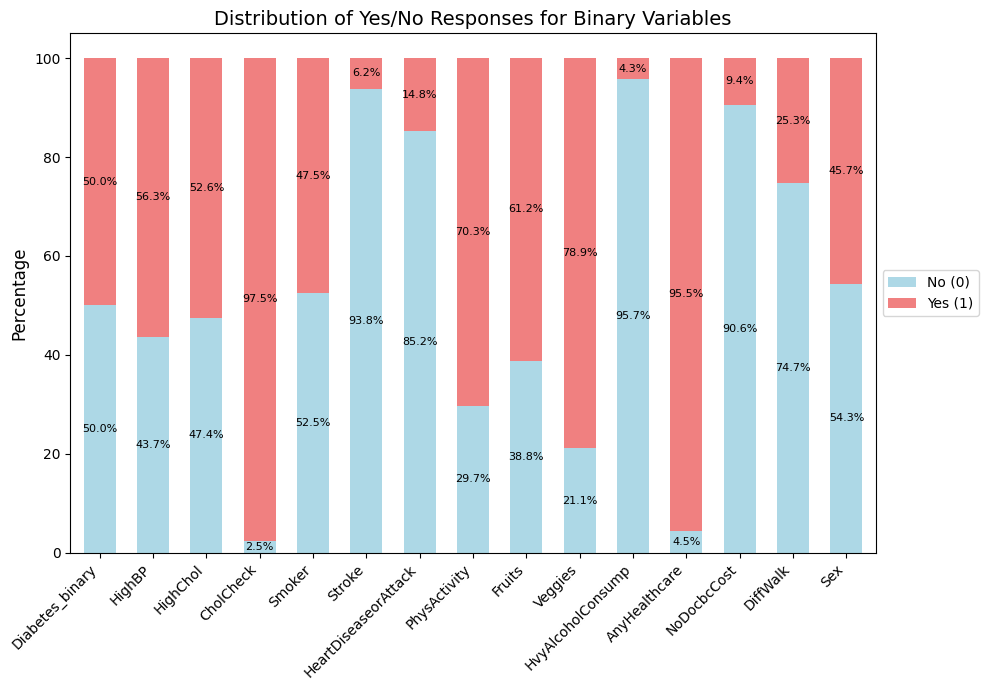

In [10]:
# List of binary columns
binary_columns = ['Diabetes_binary','HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                  'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                  'NoDocbcCost', 'DiffWalk', 'Sex']

# Create a DataFrame to store percentages for plotting
binary_percentages = pd.DataFrame()

# Calculate percentages for each binary column
for col in binary_columns:
    counts = df[col].value_counts(normalize=True) * 100  # Get percentages
    binary_percentages[col] = counts

# Transpose the DataFrame to make the columns the index (for easier plotting)
binary_percentages = binary_percentages.T

# Plot stacked bar chart
ax = binary_percentages.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'lightcoral'], width=0.6)

# Add labels inside the bars with smaller font
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=8, color='black')

# Move the legend to the right
plt.legend(['No (0)', 'Yes (1)'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Add labels and title
plt.title('Distribution of Yes/No Responses for Binary Variables', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## **2. Health Analysis**

### **2.1. Body Mass Index**

In [11]:
# Descriptive statistics for BMI column
bmi_stats = df['BMI'].describe()
print(bmi_stats)

count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64


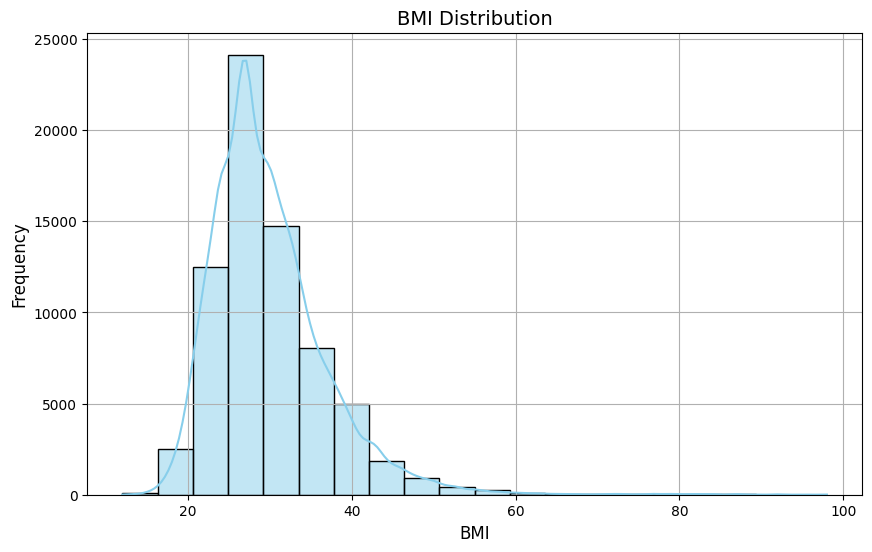

In [12]:
# Create a histogram distribution chart for BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')  # kde=True adds a Kernel Density Estimate line
plt.title('BMI Distribution', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)  # Adds grid for better readability
plt.show()

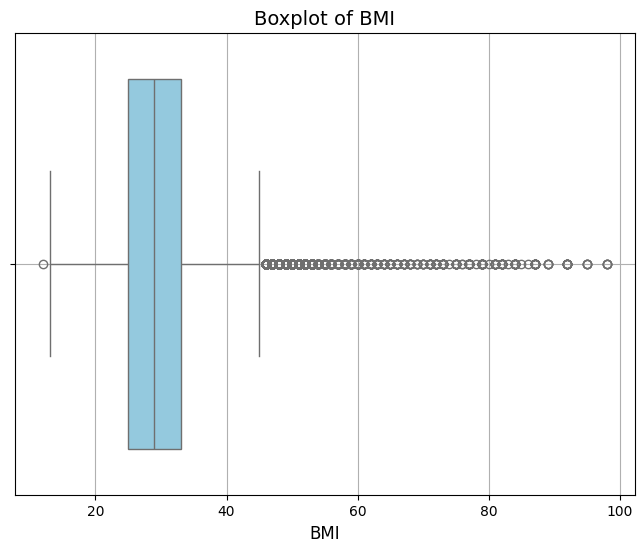

In [13]:
# Create a boxplot for BMI to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['BMI'], color='skyblue')

# Add title and labels
plt.title('Boxplot of BMI', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.grid(True)  # Optional: Add grid for clarity

# Show the plot
plt.show()

In [14]:
# Define a function to categorize BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 39.9:
        return 'Obese'
    else:  # bmi > 40
        return 'Severe Obesity'

# Apply the function to create a new column 'BMI_grouping'
df['BMI_grouping'] = df['BMI'].apply(categorize_bmi)

# Check the first few rows to verify
print(df[['BMI', 'BMI_grouping']].head(10))

   BMI BMI_grouping
0   26   Overweight
1   26   Overweight
2   26   Overweight
3   28   Overweight
4   29   Overweight
5   18  Underweight
6   26   Overweight
7   31        Obese
8   32        Obese
9   27   Overweight


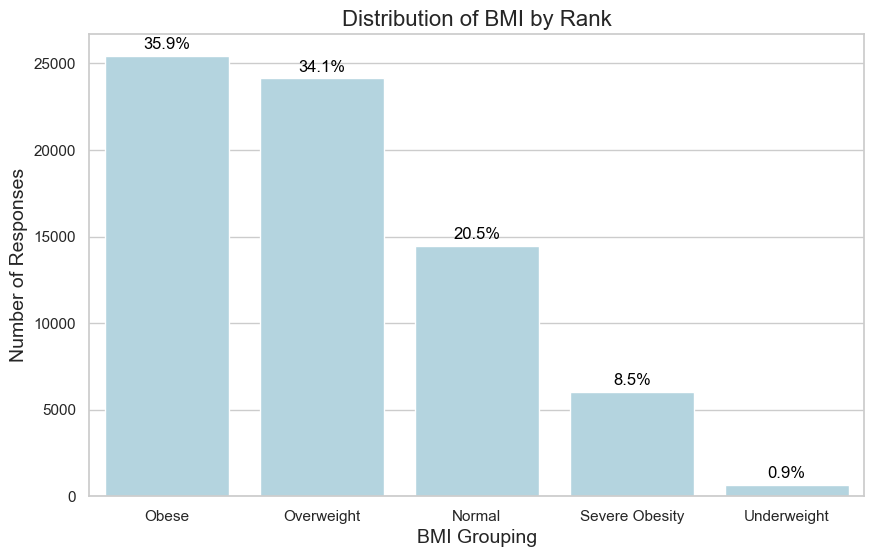

In [15]:
# Visualize the new categorical variable
sns.set(style="whitegrid")

# Create a count plot for the BMI_grouping with a single color
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI_grouping', order=df['BMI_grouping'].value_counts().index, color='lightblue')

# Add titles and labels
plt.title('Distribution of BMI by Rank', fontsize=16)
plt.xlabel('BMI Grouping', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)

# Show percentage on top of the bars
total_responses = len(df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/total_responses:.1%}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', 
                       rotation=0, xytext=(0, 5), 
                       textcoords='offset points')

# Show the plot
plt.show()

### **2.2. General Health**

In [17]:
# Distribution of values in percentages
print(df['GenHlth'].value_counts(normalize=True) * 100)

GenHlth
3    33.139535
2    28.110677
4    18.818254
1    11.715611
5     8.215923
Name: proportion, dtype: float64


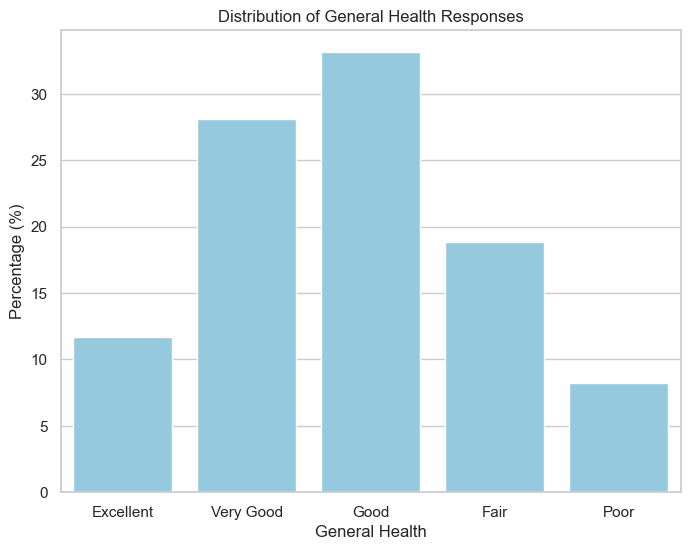

In [18]:
# Create a dictionary to map the GenHlth values to their corresponding descriptions
genhlth_labels = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

# Calculate percentage shares of 'GenHlth' values
genhlth_counts = df['GenHlth'].value_counts(normalize=True) * 100  # Percentage shares

# Create the histogram without labels above the bars
plt.figure(figsize=(8, 6))
sns.barplot(x=genhlth_counts.index, y=genhlth_counts.values, color='skyblue')

# Customize labels and title
plt.xlabel('General Health')
plt.ylabel('Percentage (%)')
plt.title('Distribution of General Health Responses')

# Replace x-axis ticks with descriptions
plt.xticks(ticks=genhlth_counts.index - 1, labels=[genhlth_labels[i] for i in genhlth_counts.index])

# Display the plot
plt.show()

In [19]:
# Find average BMI for each health group
avg_bmi_per_genhlth = df.groupby('GenHlth')['BMI'].mean()

# Map the GenHlth values to their corresponding descriptions
genhlth_labels = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

# Rename the index of the result for readability
avg_bmi_per_genhlth.index = avg_bmi_per_genhlth.index.map(genhlth_labels)

# Display the result
print(avg_bmi_per_genhlth)

GenHlth
Excellent    26.164212
Very Good    28.323973
Good         30.612712
Fair         31.984289
Poor         32.447142
Name: BMI, dtype: float64


In [22]:
# Define a mapping for the GenHealth values
genhealth_mapping = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}

# Replace the numerical values with their categorical meanings
df['GenHlth'] = df['GenHlth'].replace(genhealth_mapping)

# List of binary variables
binary_vars = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
    'DiffWalk', 'Sex', 'HighBMI'
]

# Convert binary variables to 0 and 1 if they are in 'yes'/'no' format
df[binary_vars] = df[binary_vars].replace({'yes': 1, 'no': 0})

# Group by 'GenHealth' and calculate the percentage of 'yes'
percentage_yes = df.groupby('GenHlth')[binary_vars].mean() * 100

# Optionally, round the percentages for better readability
percentage_yes = percentage_yes.round(2)

# Display the results
print(percentage_yes)

           Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  Stroke  \
GenHlth                                                                   
Excellent            13.76   25.42     29.11      95.60   34.68    1.47   
Fair                 73.59   73.92     65.63      98.59   54.97   10.57   
Good                 57.44   62.25     56.37      97.92   48.39    5.24   
Poor                 78.82   78.70     70.01      98.61   63.29   19.30   
Very Good            32.11   43.98     44.03      96.83   42.28    2.61   

           HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
GenHlth                                                          
Excellent                  3.50         86.61   70.06    85.79   
Fair                      24.57         56.50   55.61    73.31   
Good                      13.76         69.96   59.79    77.68   
Poor                      40.08         43.13   54.05    70.92   
Very Good                  6.74         81.10   64.94    83.46   

           

### **2.3. Mental Health**

In [23]:
# Calculate the distribution of 'MentHlth' values in percentages
menthlth_distribution = df['MentHlth'].value_counts(normalize=True) * 100

# Convert the index to a categorical type (if it's not already) and sort it
menthlth_distribution_sorted = menthlth_distribution.sort_index()

# Print the sorted distribution
print(menthlth_distribution_sorted)

MentHlth
0     68.028914
1      2.901318
2      4.621456
3      2.782493
4      1.387710
5      3.563345
6      0.407401
7      1.167034
8      0.280088
9      0.039608
10     2.721666
11     0.011317
12     0.183896
13     0.021219
14     0.499349
15     2.499576
16     0.039608
17     0.025463
18     0.059413
19     0.009902
20     1.591411
21     0.118825
22     0.031121
23     0.018390
24     0.014146
25     0.601200
26     0.024048
27     0.024048
28     0.140044
29     0.074973
30     6.111017
Name: proportion, dtype: float64


In [109]:
# Describe the 'MentHlth' column statistically
menthlth_stats = df['MentHlth'].describe()
print(menthlth_stats)

# Calculate the median of the 'MentHlth' column
median_menthlth = df['MentHlth'].median()
print(f"Median of MentHlth: {median_menthlth}")

count    70692.000000
mean         3.752037
std          8.155627
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MentHlth, dtype: float64
Median of MentHlth: 0.0


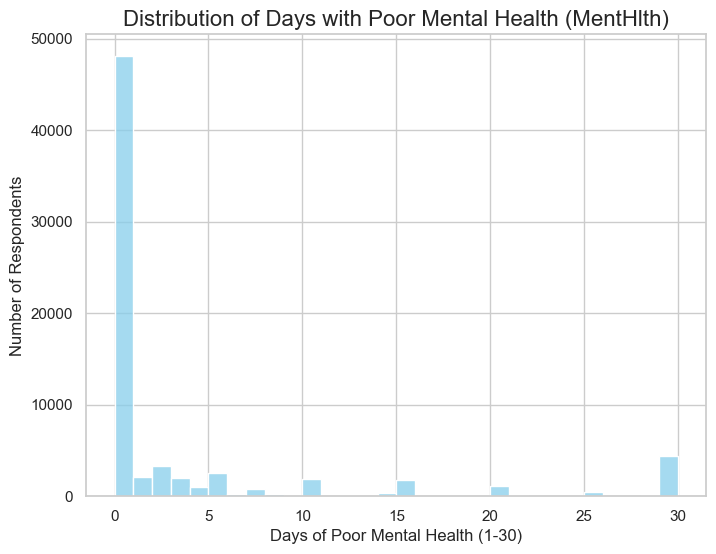

In [24]:
# Create a histogram for 'MentHlth'
plt.figure(figsize=(8, 6))
sns.histplot(df['MentHlth'], bins=30, kde=False, color='skyblue')

# Add titles and labels
plt.title('Distribution of Days with Poor Mental Health (MentHlth)', fontsize=16)
plt.xlabel('Days of Poor Mental Health (1-30)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Show the plot
plt.show()

### **2.4. Physical Health**

In [26]:
# Calculate the distribution of 'MentHlth' values in percentages
physhlth_distribution = df['PhysHlth'].value_counts(normalize=True) * 100

# Convert the index to a categorical type (if it's not already) and sort it
physhlth_distribution_sorted = physhlth_distribution.sort_index()

# Print the sorted distribution
print(physhlth_distribution_sorted)

PhysHlth
0     56.463249
1      4.035817
2      5.802637
3      3.448764
4      1.946472
5      3.298817
6      0.632320
7      1.875743
8      0.390426
9      0.077802
10     2.800883
11     0.031121
12     0.289990
13     0.036779
14     1.134499
15     2.706105
16     0.070729
17     0.049511
18     0.070729
19     0.014146
20     1.827647
21     0.323940
22     0.043852
23     0.038194
24     0.033950
25     0.787925
26     0.036779
27     0.048096
28     0.298478
29     0.134386
30    11.250212
Name: proportion, dtype: float64


In [111]:
# Describe the 'PhysHlth' column statistically
physhlth_stats = df['PhysHlth'].describe()
print(physhlth_stats)

# Calculate the median of the 'PhysHlth' column
median_menthlth = df['PhysHlth'].median()
print(f"Median of PhysHlth: {median_menthlth}")

count    70692.000000
mean         5.810417
std         10.062261
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: PhysHlth, dtype: float64
Median of PhysHlth: 0.0


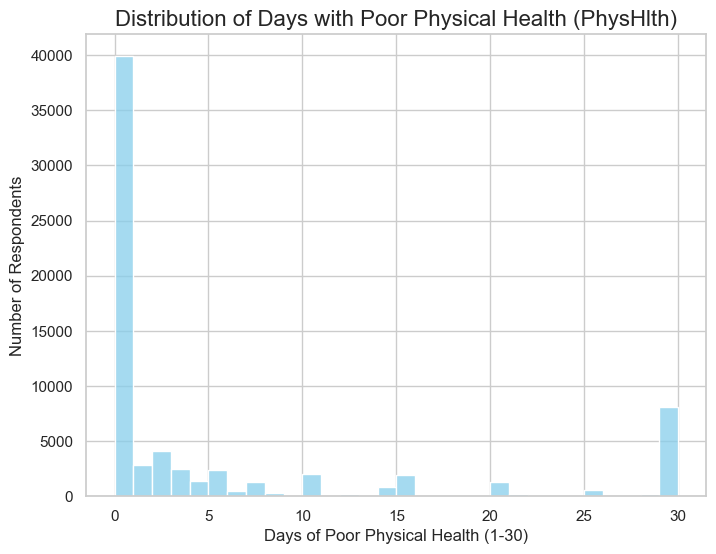

In [27]:
# Create a histogram for 'PhysHlth'
plt.figure(figsize=(8, 6))
sns.histplot(df['PhysHlth'], bins=30, kde=False, color='skyblue')

# Add titles and labels
plt.title('Distribution of Days with Poor Physical Health (PhysHlth)', fontsize=16)
plt.xlabel('Days of Poor Physical Health (1-30)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Show the plot
plt.show()

## **3. DEMOGRAPHY**

### **3.1. Age Analysis**

In [30]:
# Map the Age column to age group strings and count occurrences
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Define the order of age groups
age_group_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                   '60-64', '65-69', '70-74', '75-79', '80-99', 'Don’t know / Refused / Missing']

# Map Age to age groups and calculate the counts
age_group_counts = df['Age'].map(age_mapping).value_counts()

# Calculate the percentages for each age group
age_group_percentages = df['Age'].map(age_mapping).value_counts(normalize=True) * 100

# Create a DataFrame of counts and percentages
age_distribution = pd.DataFrame({
    'Counts': age_group_counts,
    'Percentages': age_group_percentages
})

# Reindex to ensure the age groups are in ascending order
age_distribution = age_distribution.reindex(age_group_order)

# Display the result
print(age_distribution)

                                 Counts  Percentages
Age                                                 
18-24                             979.0     1.384881
25-29                            1396.0     1.974764
30-34                            2049.0     2.898489
35-39                            2793.0     3.950942
40-44                            3520.0     4.979347
45-49                            4648.0     6.575001
50-54                            6872.0     9.721043
55-59                            8603.0    12.169694
60-64                           10112.0    14.304306
65-69                           10856.0    15.356759
70-74                            8044.0    11.378940
75-79                            5394.0     7.630283
80-99                            5426.0     7.675550
Don’t know / Refused / Missing      NaN          NaN


In [31]:
import pandas as pd

# Assuming you have a DataFrame 'df' with the 'Age' column

# Define the midpoint for each age group
age_midpoints = {
    1: 21, 2: 27, 3: 32, 4: 37, 5: 42, 
    6: 47, 7: 52, 8: 57, 9: 62, 10: 67, 
    11: 72, 12: 77, 13: 89, 14: None  # No midpoint for 'Don’t know / Refused / Missing'
}

# Define the age group mapping
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Define the order of age groups
age_group_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                   '60-64', '65-69', '70-74', '75-79', '80-99', 'Don’t know / Refused / Missing']

# Map the Age column to midpoints
df['Age_Midpoints'] = df['Age'].map(age_midpoints)

# Group by the categorical Age groups and calculate mean and median for midpoints
age_stats = df.groupby(df['Age'].map(age_mapping))['Age_Midpoints'].agg(['mean', 'median'])

# Reindex to ensure the age groups are in ascending order
age_stats = age_stats.reindex(age_group_order)

# Display the average and median ages for each group
print(age_stats)

                                mean  median
Age                                         
18-24                           21.0    21.0
25-29                           27.0    27.0
30-34                           32.0    32.0
35-39                           37.0    37.0
40-44                           42.0    42.0
45-49                           47.0    47.0
50-54                           52.0    52.0
55-59                           57.0    57.0
60-64                           62.0    62.0
65-69                           67.0    67.0
70-74                           72.0    72.0
75-79                           77.0    77.0
80-99                           89.0    89.0
Don’t know / Refused / Missing   NaN     NaN


In [140]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the share of 'yes' (1) for Diabetes_binary in each age group
diabetes_shares = df.groupby('Age_Groups')['Diabetes_binary'].mean() * 100

# Sort by ascending order of age groups
diabetes_shares = diabetes_shares.reindex(['18-24', '25-29', '30-34', '35-39', '40-44', 
                                           '45-49', '50-54', '55-59', '60-64', '65-69', 
                                           '70-74', '75-79', '80-99', 'Don’t know / Refused / Missing'])

# Display the shares of 'yes' (1) in percentages
print(diabetes_shares)

Age_Groups
18-24                              7.967314
25-29                             10.028653
30-34                             15.324549
35-39                             22.413176
40-44                             29.857955
45-49                             37.478485
50-54                             44.935972
55-59                             49.552482
60-64                             56.695016
65-69                             60.408990
70-74                             63.910990
75-79                             63.088617
80-99                             59.141172
Don’t know / Refused / Missing          NaN
Name: Diabetes_binary, dtype: float64


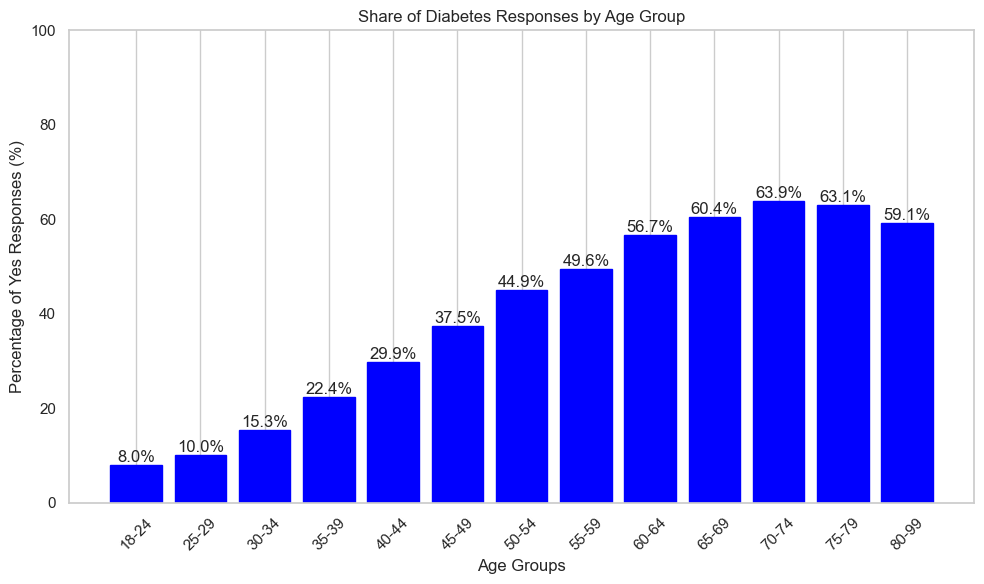

In [32]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the share of 'yes' (1) for Diabetes_binary in each age group
diabetes_shares = df.groupby('Age_Groups')['Diabetes_binary'].mean() * 100

# Sort by ascending order of age groups
diabetes_shares = diabetes_shares.reindex(['18-24', '25-29', '30-34', '35-39', '40-44', 
                                           '45-49', '50-54', '55-59', '60-64', '65-69', 
                                           '70-74', '75-79', '80-99'])

# Plotting the distribution as a histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(diabetes_shares.index, diabetes_shares, color='blue', edgecolor='blue')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Share of Diabetes Responses by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Yes Responses (%)')
plt.xticks(rotation=45)

# Setting y-axis limits
plt.ylim(0, 100)

# Adding grid
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

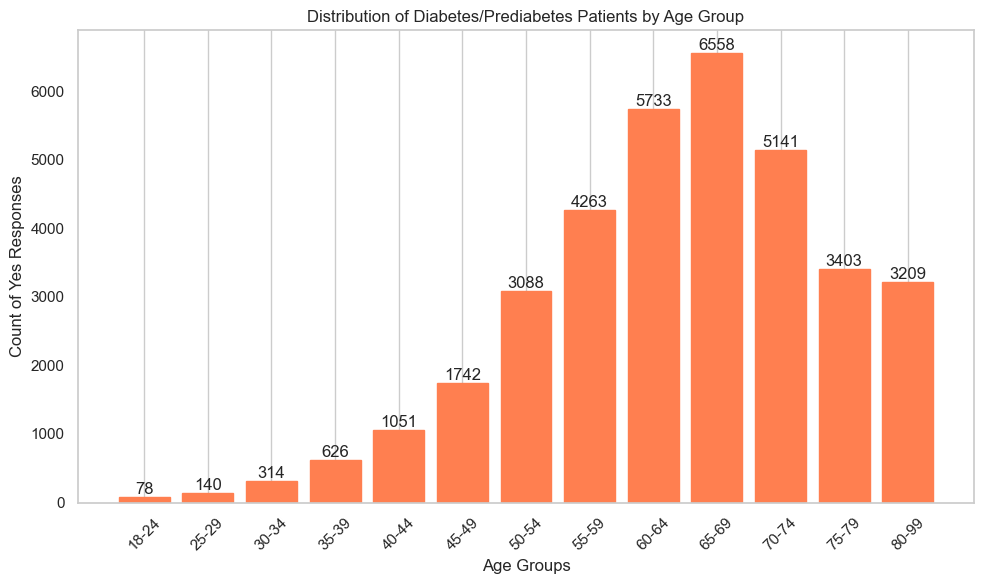

In [33]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the count of 'yes' (1) for Diabetes_binary in each age group
diabetes_counts = df.groupby('Age_Groups')['Diabetes_binary'].sum()

# Sort by ascending order of age groups
diabetes_counts = diabetes_counts.reindex(['18-24', '25-29', '30-34', '35-39', '40-44', 
                                           '45-49', '50-54', '55-59', '60-64', '65-69', 
                                           '70-74', '75-79', '80-99'])

# Plotting the distribution as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(diabetes_counts.index, diabetes_counts, color='coral', edgecolor='coral')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    # Only label bars with positive height
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Adding title and labels
plt.title('Distribution of Diabetes/Prediabetes Patients by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count of Yes Responses')
plt.xticks(rotation=45)

# Adding grid
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the count of 'yes' (1) for Diabetes_binary in each age group
diabetes_counts = df[df['Diabetes_binary'] == 1].groupby('Age_Groups').size()

# Calculate the total number of 'yes' responses across all age groups
total_yes = diabetes_counts.sum()

# Calculate the share of 'yes' responses as a percentage
diabetes_shares = (diabetes_counts / total_yes) * 100

# Create a DataFrame for better representation
diabetes_summary = pd.DataFrame({
    'Count of Yes Responses': diabetes_counts,
    'Share of Yes Responses (%)': diabetes_shares
}).fillna(0)

# Sort by ascending order of age groups
diabetes_summary = diabetes_summary.reindex(['18-24', '25-29', '30-34', '35-39', '40-44', 
                                             '45-49', '50-54', '55-59', '60-64', '65-69', 
                                             '70-74', '75-79', '80-99', 'Don’t know / Refused / Missing'])

# Display the summary table
print(diabetes_summary)

                                Count of Yes Responses  \
Age_Groups                                               
18-24                                             78.0   
25-29                                            140.0   
30-34                                            314.0   
35-39                                            626.0   
40-44                                           1051.0   
45-49                                           1742.0   
50-54                                           3088.0   
55-59                                           4263.0   
60-64                                           5733.0   
65-69                                           6558.0   
70-74                                           5141.0   
75-79                                           3403.0   
80-99                                           3209.0   
Don’t know / Refused / Missing                     NaN   

                                Share of Yes Responses (%)  
Age_Groups

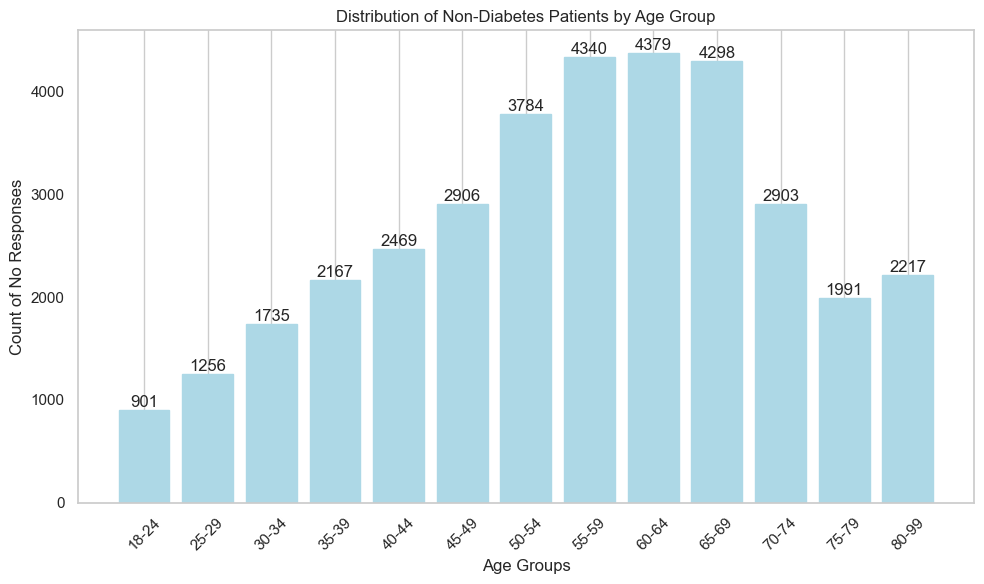

In [35]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the count of 'no' (0) for Diabetes_binary in each age group
no_diabetes_counts = df.groupby('Age_Groups')['Diabetes_binary'].apply(lambda x: (x == 0).sum())

# Sort by ascending order of age groups
no_diabetes_counts = no_diabetes_counts.reindex(['18-24', '25-29', '30-34', '35-39', '40-44', 
                                                 '45-49', '50-54', '55-59', '60-64', '65-69', 
                                                 '70-74', '75-79', '80-99'])

# Plotting the distribution as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(no_diabetes_counts.index, no_diabetes_counts, color='lightblue', edgecolor='lightblue')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    # Only label bars with positive height
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Adding title and labels
plt.title('Distribution of Non-Diabetes Patients by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count of No Responses')
plt.xticks(rotation=45)

# Adding grid
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
# Define the mapping for Age groups
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80-99', 14: 'Don’t know / Refused / Missing'
}

# Create a new column 'Age_Groups' for mapping age values
df['Age_Groups'] = df['Age'].map(age_mapping)

# Calculate the average BMI for each age group, split by Diabetes_binary (1: yes, 0: no)
average_bmi = df.groupby(['Age_Groups', 'Diabetes_binary'])['BMI'].mean().unstack()

# Rename the columns for clarity
average_bmi.columns = ['Average BMI (Not Patients)', 'Average BMI (Patients)']

# Display the resulting DataFrame
print(average_bmi)

            Average BMI (Not Patients)  Average BMI (Patients)
Age_Groups                                                    
18-24                        25.913430               29.666667
25-29                        27.447452               34.164286
30-34                        28.060519               34.232484
35-39                        28.406091               34.378594
40-44                        28.464966               35.059943
45-49                        28.497935               34.043054
50-54                        28.233615               33.569948
55-59                        28.135714               33.323950
60-64                        27.883535               32.643817
65-69                        27.828990               32.077310
70-74                        27.345160               30.895935
75-79                        26.949272               29.810167
80-99                        25.576906               28.065129


In [37]:
# Step 1: Define the age midpoints for each age group
age_midpoints = {
    1: 21, 2: 27, 3: 32, 4: 37, 5: 42, 
    6: 47, 7: 52, 8: 57, 9: 62, 10: 67, 
    11: 72, 12: 77, 13: 89
}

# Step 2: Filter the data for diabetics (Diabetes_binary == 1) and non-diabetics (Diabetes_binary == 0)
diabetics = df[df['Diabetes_binary'] == 1]
non_diabetics = df[df['Diabetes_binary'] == 0]

# Step 3: Calculate the proportion (weight) of each age group in diabetics and non-diabetics
diabetics_proportions = diabetics['Age'].value_counts(normalize=True).sort_index()
non_diabetics_proportions = non_diabetics['Age'].value_counts(normalize=True).sort_index()

# Step 4: Create a table with the midpoints and the proportions for each group
age_group_table = pd.DataFrame({
    'Age_Group': [age_mapping[age] for age in diabetics_proportions.index],  # Mapping the age groups
    'Midpoint': [age_midpoints[age] for age in diabetics_proportions.index],  # Midpoints for each age group
    'Proportion_Diabetics': diabetics_proportions.values,                    # Proportion of diabetics
    'Proportion_Non_Diabetics': non_diabetics_proportions.values             # Proportion of non-diabetics
})

# Display the table
print(age_group_table)

   Age_Group  Midpoint  Proportion_Diabetics  Proportion_Non_Diabetics
0      18-24        21              0.002207                  0.025491
1      25-29        27              0.003961                  0.035534
2      30-34        32              0.008884                  0.049086
3      35-39        37              0.017711                  0.061308
4      40-44        42              0.029735                  0.069852
5      45-49        47              0.049284                  0.082216
6      50-54        52              0.087365                  0.107056
7      55-59        57              0.120608                  0.122786
8      60-64        62              0.162197                  0.123890
9      65-69        67              0.185537                  0.121598
10     70-74        72              0.145448                  0.082131
11     75-79        77              0.096277                  0.056329
12     80-99        89              0.090788                  0.062723


In [38]:
# Step 1: Define the age midpoints for each age group
age_midpoints = {
    1: 21, 2: 27, 3: 32, 4: 37, 5: 42, 
    6: 47, 7: 52, 8: 57, 9: 62, 10: 67, 
    11: 72, 12: 77, 13: 89
}

# Step 2: Filter the data for diabetics (Diabetes_binary == 1) and non-diabetics (Diabetes_binary == 0)
diabetics = df[df['Diabetes_binary'] == 1]
non_diabetics = df[df['Diabetes_binary'] == 0]

# Step 3: Calculate the proportion (weight) of each age group in diabetics and non-diabetics
diabetics_proportions = diabetics['Age'].value_counts(normalize=True)
non_diabetics_proportions = non_diabetics['Age'].value_counts(normalize=True)

# Step 4: Calculate the weighted average for diabetics
weighted_average_age_diabetics = sum(age_midpoints[age] * proportion for age, proportion in diabetics_proportions.items())

# Step 5: Calculate the weighted average for non-diabetics
weighted_average_age_non_diabetics = sum(age_midpoints[age] * proportion for age, proportion in non_diabetics_proportions.items())

# Display the results
print(f"Weighted Average Age for Diabetics: {weighted_average_age_diabetics:.2f}")
print(f"Weighted Average Age for Non-Diabetics: {weighted_average_age_non_diabetics:.2f}")

Weighted Average Age for Diabetics: 64.53
Weighted Average Age for Non-Diabetics: 56.36


In [39]:
 # Step 1: Calculate the mean for each age group
age_group_means = df.groupby(df['Age'].map(age_mapping))['Age_Midpoints'].mean()

# Step 2: Calculate the proportion (weight) for each group
age_group_proportions = df['Age'].map(age_mapping).value_counts(normalize=True)

# Step 3: Calculate the weighted average
weighted_average = (age_group_means * age_group_proportions).sum()

# Display the result
print(f"Weighted Average Age: {weighted_average:.2f}")

Weighted Average Age: 60.44


In [40]:
# Define a dictionary to map the Age column to age midpoints
age_midpoints = {
    1: 21, 2: 27, 3: 32, 4: 37, 5: 42, 
    6: 47, 7: 52, 8: 57, 9: 62, 10: 67, 
    11: 72, 12: 77, 13: 90
}

# Step 1: Map age midpoints to the dataset
df['Age_Midpoints'] = df['Age'].map(age_midpoints)

# Step 2: Calculate the weighted average for each gender
def weighted_avg_age_by_gender(gender):
    # Filter by gender
    gender_df = df[df['Sex'] == gender]
    
    # Calculate the mean midpoint for each age group
    age_group_means = gender_df.groupby(gender_df['Age'].map(age_midpoints))['Age_Midpoints'].mean()
    
    # Calculate the proportion (weight) for each age group within the gender
    age_group_proportions = gender_df['Age'].map(age_midpoints).value_counts(normalize=True)
    
    # Calculate the weighted average
    weighted_average = (age_group_means * age_group_proportions).sum()
    
    return weighted_average

# Step 3: Get the weighted average for each gender
weighted_avg_female = weighted_avg_age_by_gender(0)  # Female
weighted_avg_male = weighted_avg_age_by_gender(1)    # Male

# Display the results
print(f"Weighted Average Age for Females: {weighted_avg_female:.2f}")
print(f"Weighted Average Age for Males: {weighted_avg_male:.2f}")

Weighted Average Age for Females: 60.59
Weighted Average Age for Males: 60.44


### **3.2. Education Analysis**

In [8]:
# Define a mapping for the Education column
education_mapping = {
    1: 'Didn’t graduate high school', 2: 'Didn’t graduate high school', 3: 'Didn’t graduate high school',
    4: 'Graduated high school', 
    5: 'Attended college or technical school', 
    6: 'Graduated college or technical school', 
    9: 'Don’t know / Refused / Missing'
}

# Define the order of education levels
education_order = ['Didn’t graduate high school', 'Graduated high school', 'Attended college or technical school', 
                   'Graduated college or technical school', 'Don’t know / Refused / Missing']

# Map the Education column to the defined categories
education_group_counts = df['Education'].map(education_mapping).value_counts()

# Calculate the percentages for each education group
education_group_percentages = df['Education'].map(education_mapping).value_counts(normalize=True) * 100

# Create a DataFrame of counts and percentages
education_distribution = pd.DataFrame({
    'Counts': education_group_counts,
    'Percentages': education_group_percentages
})

# Reindex to ensure the education groups are in the correct order
education_distribution = education_distribution.reindex(education_order)

# Display the result
print(education_distribution)

                                        Counts  Percentages
Education                                                  
Didn’t graduate high school             5169.0     7.312001
Graduated high school                  19473.0    27.546257
Attended college or technical school   20030.0    28.334182
Graduated college or technical school  26020.0    36.807560
Don’t know / Refused / Missing             NaN          NaN


In [9]:
# Calculate the shares of 'yes' responses for each education group
education_shares = df.groupby(df['Education'].map(education_mapping))['Diabetes_binary'].mean() * 100

# Reindex to ensure the education groups are in the correct order
education_shares = education_shares.reindex(education_order)

# Display the result
print(education_shares)

Education
Didn’t graduate high school              68.214355
Graduated high school                    56.827402
Attended college or technical school     51.692461
Graduated college or technical school    39.969254
Don’t know / Refused / Missing                 NaN
Name: Diabetes_binary, dtype: float64


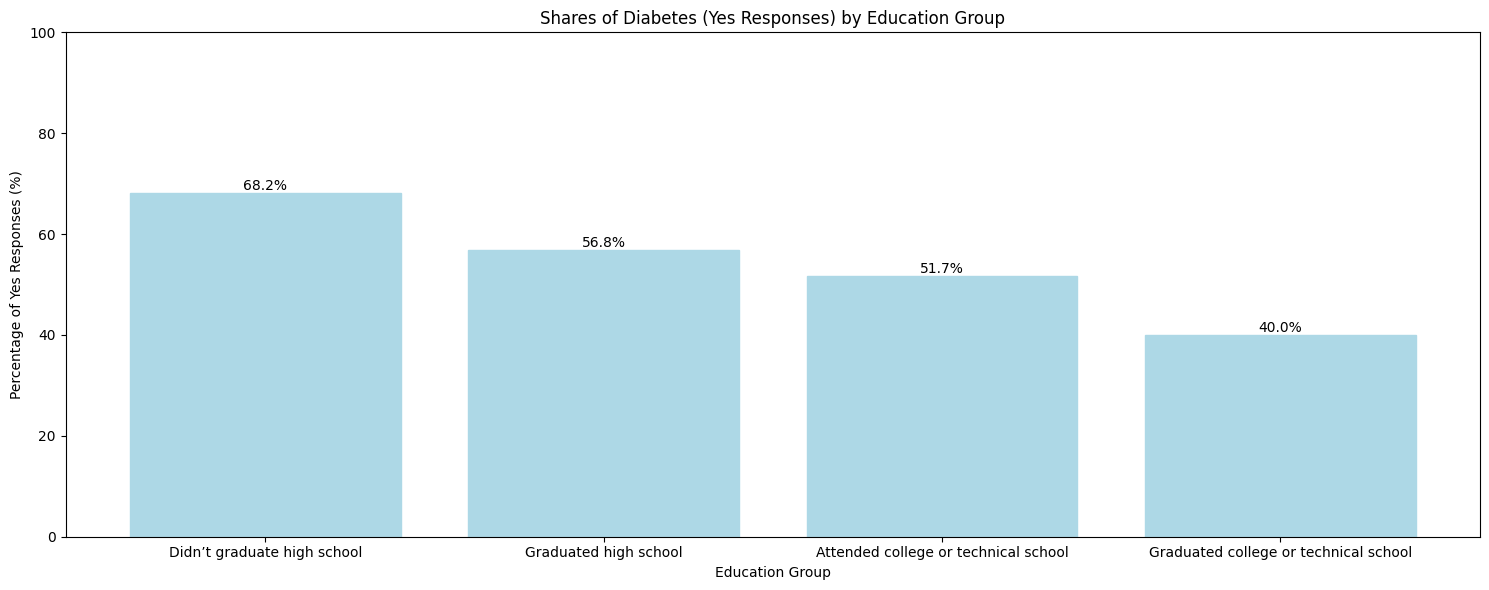

In [12]:
# Calculate the shares of 'yes' responses for each education group
education_shares = df.groupby(df['Education'].map(education_mapping))['Diabetes_binary'].mean() * 100

# Reindex to ensure the education groups are in the correct order
education_shares = education_shares.reindex(education_order)

# Plotting the histogram
plt.figure(figsize=(15, 6))
bars = plt.bar(education_shares.index, education_shares, color='lightblue', edgecolor='lightblue')

# Adding labels on top of the bars, ensuring values are finite
for bar in bars:
    yval = bar.get_height()
    if np.isfinite(yval):  # Check if the value is finite
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom')

# Adding labels and title
plt.title('Shares of Diabetes (Yes Responses) by Education Group')
plt.xlabel('Education Group')
plt.ylabel('Percentage of Yes Responses (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Map Education values to categories and combine categories 1, 2, and 3
education_mapping = {
    1: 'Didn’t graduate high school', 
    2: 'Didn’t graduate high school', 
    3: 'Didn’t graduate high school',
    4: 'Graduated high school',
    5: 'Attended college or technical school',
    6: 'Graduated college or technical school',
    9: 'Don’t know / Refused to answer / Missing'
}

# Map Education to education groups
df['Education_Groups'] = df['Education'].map(education_mapping)

# Count the number of 'yes' (1) responses for each education group
yes_counts = df[df['Diabetes_binary'] == 1].groupby('Education_Groups')['Diabetes_binary'].count()

# Calculate the total number of 'yes' responses
total_yes = yes_counts.sum()

# Calculate the shares
yes_shares = (yes_counts / total_yes) * 100

# Create a DataFrame to display counts and shares
result_table = pd.DataFrame({
    'Count': yes_counts,
    'Shares (%)': yes_shares
}).fillna(0)  # Fill any NaN values with 0

# Reindex to ensure the education groups are in a logical order
education_group_order = [
    'Didn’t graduate high school',
    'Graduated high school',
    'Attended college or technical school',
    'Graduated college or technical school',
    'Don’t know / Refused to answer / Missing'
]
result_table = result_table.reindex(education_group_order)

# Display the result table
print(result_table)

                                            Count  Shares (%)
Education_Groups                                             
Didn’t graduate high school                3526.0    9.975669
Graduated high school                     11066.0   31.307644
Attended college or technical school      10354.0   29.293272
Graduated college or technical school     10400.0   29.423414
Don’t know / Refused to answer / Missing      NaN         NaN


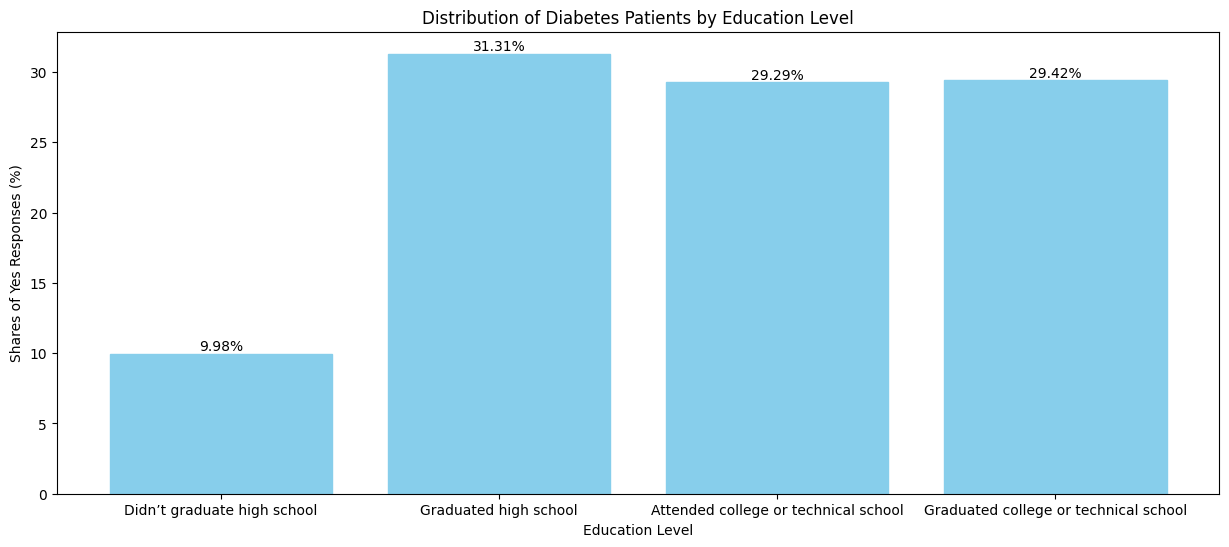

In [16]:
# Extracting shares for plotting and ensuring they are finite
shares = result_table['Shares (%)']
education_groups = result_table.index

# Filter out any NaN or infinite values
finite_indices = np.isfinite(shares)
education_groups = education_groups[finite_indices]
shares = shares[finite_indices]

# Plotting the distribution as a bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(education_groups, shares, color='skyblue', edgecolor='skyblue')

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    if np.isfinite(yval):  # Check if the value is finite
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Distribution of Diabetes Patients by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Shares of Yes Responses (%)')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [17]:
# Define the mapping for Education categories
education_mapping = {
    1: "Didn't graduate high school", 
    2: "Didn't graduate high school", 
    3: "Didn't graduate high school", 
    4: 'Graduated high school', 
    5: 'Attended college or technical school', 
    6: 'Graduated college or technical school'
}

# Map the Education column to new categories
df['Education_Group'] = df['Education'].map(education_mapping)

# Count the number of males and females in each education group
gender_counts = df.groupby(['Education_Group', 'Sex']).size().unstack(fill_value=0)

# Calculate the total counts for each education group
gender_counts['Total'] = gender_counts.sum(axis=1)

# Calculate shares (percentage) for males and females
gender_counts['Male Share (%)'] = (gender_counts[1] / gender_counts['Total']) * 100
gender_counts['Female Share (%)'] = (gender_counts[0] / gender_counts['Total']) * 100

# Select relevant columns for display and sort by education groups
result_table = gender_counts[['Total', 'Male Share (%)', 'Female Share (%)']]

# Reindex to ensure the education groups are in ascending order
ordered_categories = [
    "Didn't graduate high school", 
    'Graduated high school', 
    'Attended college or technical school', 
    'Graduated college or technical school'
]

result_table = result_table.reindex(ordered_categories)

# Display the result table
print(result_table)

Sex                                    Total  Male Share (%)  Female Share (%)
Education_Group                                                               
Didn't graduate high school             5169       42.000387         57.999613
Graduated high school                  19473       44.738869         55.261131
Attended college or technical school   20030       42.765851         57.234149
Graduated college or technical school  26020       49.411991         50.588009


In [48]:
# Define the mapping for Education categories
education_mapping = {
    1: "Didn't graduate high school", 
    2: "Didn't graduate high school", 
    3: "Didn't graduate high school", 
    4: 'Graduated high school', 
    5: 'Attended college or technical school', 
    6: 'Graduated college or technical school'
}

# Map the Education column to new categories
df['Education_Group'] = df['Education'].map(education_mapping)

# Calculate average BMI for each education group and gender
average_bmi = df.groupby(['Education_Group', 'Sex'])['BMI'].mean().unstack()

# Calculate total average BMI for each education group
average_bmi['Average BMI (Total)'] = average_bmi.mean(axis=1)

# Rename the columns for clarity
average_bmi.columns = ['Average BMI (Female)', 'Average BMI (Male)', 'Average BMI (Total)']

# Display the result
print(average_bmi)

                                       Average BMI (Female)  \
Education_Group                                               
Attended college or technical school              30.316992   
Didn't graduate high school                       31.459306   
Graduated college or technical school             28.514624   
Graduated high school                             30.543258   

                                       Average BMI (Male)  Average BMI (Total)  
Education_Group                                                                 
Attended college or technical school            30.426453            30.371723  
Didn't graduate high school                     30.279595            30.869450  
Graduated college or technical school           29.090068            28.802346  
Graduated high school                           30.347337            30.445298  


### **3.3. Income Analysis**

In [18]:
# Descriptive statistics for Income column
Income_stats = df['Income'].describe()
print(Income_stats)

count    70692.000000
mean         5.698311
std          2.175196
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Income, dtype: float64


In [53]:
# Define the income mapping
income_mapping = {
    1: 'Less than $25,000', 
    2: 'Less than $25,000', 
    3: 'Less than $25,000', 
    4: 'Less than $25,000', 
    5: '$25,000 - $35,000', 
    6: '$35,000 - $50,000', 
    7: '$50,000 and above', 
    8: '$50,000 and above', 
    9: 'Missing/Unknown'
}

# Apply the mapping to create a new column with merged income categories
df['Income_Category'] = df['Income'].map(income_mapping)

# Count the number of respondents in each income category
income_counts = df['Income_Category'].value_counts()

# Calculate the percentage share of each income category
income_shares = df['Income_Category'].value_counts(normalize=True) * 100

# Combine the counts and shares into a single DataFrame
income_summary = pd.DataFrame({
    'Count': income_counts,
    'Share (%)': income_shares
})

# Display the result
print(income_summary)

                   Count  Share (%)
Income_Category                    
$50,000 and above  32071  45.367227
Less than $25,000  20324  28.750071
$35,000 - $50,000  10287  14.551859
$25,000 - $35,000   8010  11.330844


In [19]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the mapping to the 'Income' column to create a new 'Income_Level' column
df['Income_Level'] = df['Income'].apply(map_income)

# Display the count and percentage share of each income level category
income_counts = df['Income_Level'].value_counts()
income_shares = df['Income_Level'].value_counts(normalize=True) * 100

# Combine the counts and shares into a single DataFrame for easier visualization
income_distribution = pd.DataFrame({
    'Count': income_counts,
    'Share (%)': income_shares
})

# Reorder the categories in ascending order (Low to High)
income_distribution = income_distribution.reindex([
    'Low Income (Less than $25,000)',
    'Middle Income ($25,000 - $35,000)',
    'Upper Middle Income ($35,000 - $50,000)',
    'High Income ($50,000 and above)',
    'Unknown/Missing'
])

# Display the result
print(income_distribution)

                                           Count  Share (%)
Income_Level                                               
Low Income (Less than $25,000)           20324.0  28.750071
Middle Income ($25,000 - $35,000)         8010.0  11.330844
Upper Middle Income ($35,000 - $50,000)  10287.0  14.551859
High Income ($50,000 and above)          32071.0  45.367227
Unknown/Missing                              NaN        NaN


In [15]:
# Calculate share of diabetes by income group
diabetes_share_by_income = df.groupby('Income')['Diabetes_binary'].mean() * 100

# Print the result
print(diabetes_share_by_income)

Income
1    65.992800
2    68.608270
3    64.207306
4    60.889156
5    56.229713
6    51.433849
7    46.083151
8    34.849365
Name: Diabetes_binary, dtype: float64


In [20]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Group by the new 'Income_category' and calculate the share of 'yes' (1) for diabetes
diabetes_share_by_income = df_cleaned[df_cleaned['Diabetes_binary'] == 1].groupby('Income_category', observed=True).size() / df_cleaned.groupby('Income_category', observed=True).size() * 100

# Sort the result by the categorical income order and print the result
diabetes_share_by_income = diabetes_share_by_income.sort_index()

print("\nDiabetes Prevalence: Share of 'Yes' Diabetes Responses by Income Category (%):")
print(diabetes_share_by_income)


Diabetes Prevalence: Share of 'Yes' Diabetes Responses by Income Category (%):
Income_category
Low Income (Less than $25,000)             64.411533
Middle Income ($25,000 - $35,000)          56.229713
Upper Middle Income ($35,000 - $50,000)    51.433849
High Income ($50,000 and above)            38.851299
dtype: float64


In [21]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Count the number of 'yes' (1) responses for diabetes by income category
diabetes_count_by_income = df_cleaned[df_cleaned['Diabetes_binary'] == 1].groupby('Income_category', observed=True).size()

# Calculate the share of 'yes' responses in each income category relative to the total 'yes' responses
total_yes_responses = diabetes_count_by_income.sum()
diabetes_share_total = (diabetes_count_by_income / total_yes_responses) * 100

# Print the counts and their share in the total
print("\nCount of 'Yes' Diabetes Responses by Income Category:")
print(diabetes_count_by_income)

print("\nShare of 'Yes' Diabetes Responses by Income Category (as % of total 'yes' responses):")
print(diabetes_share_total)


Count of 'Yes' Diabetes Responses by Income Category:
Income_category
Low Income (Less than $25,000)             13091
Middle Income ($25,000 - $35,000)           4504
Upper Middle Income ($35,000 - $50,000)     5291
High Income ($50,000 and above)            12460
dtype: int64

Share of 'Yes' Diabetes Responses by Income Category (as % of total 'yes' responses):
Income_category
Low Income (Less than $25,000)             37.036723
Middle Income ($25,000 - $35,000)          12.742602
Upper Middle Income ($35,000 - $50,000)    14.969162
High Income ($50,000 and above)            35.251514
dtype: float64


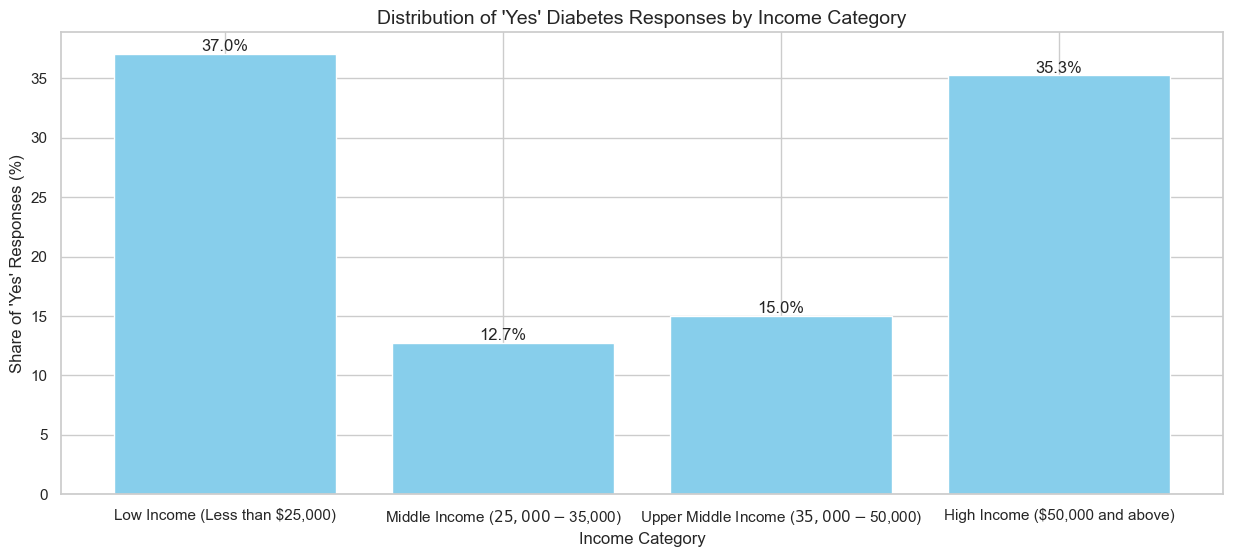

In [56]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Count the number of 'yes' (1) responses for diabetes by income category
diabetes_count_by_income = df_cleaned[df_cleaned['Diabetes_binary'] == 1].groupby('Income_category', observed=True).size()

# Calculate the share of 'yes' responses in each income category relative to the total 'yes' responses
total_yes_responses = diabetes_count_by_income.sum()
diabetes_share_total = (diabetes_count_by_income / total_yes_responses) * 100

# Create the histogram
plt.figure(figsize=(15, 6))
bars = plt.bar(diabetes_share_total.index, diabetes_share_total, color='skyblue')

# Add percentage labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Add titles and labels
plt.title("Distribution of 'Yes' Diabetes Responses by Income Category", fontsize=14)
plt.xlabel("Income Category", fontsize=12)
plt.ylabel("Share of 'Yes' Responses (%)", fontsize=12)

# Show the plot
plt.show()

In [22]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Assign income midpoints for each category
income_midpoints = {
    'Low Income (Less than $25,000)': 12500,  # midpoint
    'Middle Income ($25,000 - $35,000)': 30000,
    'Upper Middle Income ($35,000 - $50,000)': 42500,
    'High Income ($50,000 and above)': 62500
}

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Count the number of respondents in each income category (with observed=True to silence warning)
respondents_by_income = df_cleaned.groupby('Income_category', observed=True).size()

# Calculate the weighted sum of revenues using the midpoints
weighted_revenue_sum = sum(respondents_by_income[income] * income_midpoints[income] for income in income_order)

# Calculate the total number of respondents
total_respondents = respondents_by_income.sum()

# Calculate the average revenue
average_revenue = weighted_revenue_sum / total_respondents

# Prepare DataFrame to hold midpoints and shares
average_midpoints = []
category_shares = []

for income in income_order:
    midpoint = income_midpoints[income]
    share = (respondents_by_income[income] / total_respondents) * 100  # Share in percentage
    average_midpoints.append(midpoint)
    category_shares.append(share)

# Create a DataFrame for output
output_df = pd.DataFrame({
    'Income Category': income_order,
    'Average Midpoint': average_midpoints,
    'Share (%)': category_shares
})

# Print results
print(f"Average revenue per respondent based on income midpoints: ${average_revenue:.2f}")
print("\nAverage Midpoints and Shares by Income Category:")
print(output_df)

Average revenue per respondent based on income midpoints: $41532.07

Average Midpoints and Shares by Income Category:
                           Income Category  Average Midpoint  Share (%)
0           Low Income (Less than $25,000)             12500  28.750071
1        Middle Income ($25,000 - $35,000)             30000  11.330844
2  Upper Middle Income ($35,000 - $50,000)             42500  14.551859
3          High Income ($50,000 and above)             62500  45.367227


In [58]:
# Example data loading (uncomment and replace with your dataset)
# df = pd.read_csv('your_dataset.csv')

# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Count the number of respondents by income category and sex (0 = female, 1 = male)
gender_distribution = df_cleaned.groupby(['Income_category', 'Sex'], observed=True).size().unstack(fill_value=0)

# Calculate shares for each gender in each income category
gender_share = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100

# Rename the columns for clarity
gender_share.columns = ['Female (%)', 'Male (%)']

# Print results
print("Gender Distribution by Income Category:")
print(gender_share)

Gender Distribution by Income Category:
                                         Female (%)   Male (%)
Income_category                                               
Low Income (Less than $25,000)            64.982287  35.017713
Middle Income ($25,000 - $35,000)         58.077403  41.922597
Upper Middle Income ($35,000 - $50,000)   52.950326  47.049674
High Income ($50,000 and above)           47.020673  52.979327


In [59]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Count the number of respondents by income category and Poor General Health (1 = yes, 0 = no)
poor_health_distribution = df_cleaned.groupby(['Income_category', 'PoorGenHlth'], observed=True).size().unstack(fill_value=0)

# Calculate shares for each response in each income category
health_share = poor_health_distribution.div(poor_health_distribution.sum(axis=1), axis=0) * 100

# Rename the columns for clarity
health_share.columns = ['No (%)', 'Yes (%)']

# Print results
print("Distribution of Poor General Health by Income Category:")
print(health_share)

Distribution of Poor General Health by Income Category:
                                            No (%)    Yes (%)
Income_category                                              
Low Income (Less than $25,000)           82.434560  17.565440
Middle Income ($25,000 - $35,000)        91.198502   8.801498
Upper Middle Income ($35,000 - $50,000)  94.206280   5.793720
High Income ($50,000 and above)          97.078357   2.921643


In [60]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Calculate average BMI for each income category with observed=True
average_bmi = df_cleaned.groupby('Income_category', observed=True)['BMI'].mean()

# Calculate average BMI for the entire dataset
overall_average_bmi = df_cleaned['BMI'].mean()

# Print results
print("Average BMI by Income Category:")
print(average_bmi)

print("\nOverall Average BMI:")
print(overall_average_bmi)

Average BMI by Income Category:
Income_category
Low Income (Less than $25,000)             30.991783
Middle Income ($25,000 - $35,000)          30.085393
Upper Middle Income ($35,000 - $50,000)    29.978128
High Income ($50,000 and above)            29.041938
Name: BMI, dtype: float64

Overall Average BMI:
29.856985231709388


In [42]:
# Define the new income mapping based on the given ranges
def map_income(income_category):
    if income_category in [1, 2, 3, 4]:
        return 'Low Income (Less than $25,000)'
    elif income_category == 5:
        return 'Middle Income ($25,000 - $35,000)'
    elif income_category == 6:
        return 'Upper Middle Income ($35,000 - $50,000)'
    elif income_category in [7, 8]:
        return 'High Income ($50,000 and above)'
    else:
        return 'Unknown/Missing'

# Apply the income mapping function to create a new 'Income_category' column
df['Income_category'] = df['Income'].apply(map_income)

# Define ordered categories from low to high
income_order = [
    'Low Income (Less than $25,000)', 
    'Middle Income ($25,000 - $35,000)', 
    'Upper Middle Income ($35,000 - $50,000)', 
    'High Income ($50,000 and above)'
]

# Convert 'Income_category' to a categorical type with the specified order
df['Income_category'] = pd.Categorical(df['Income_category'], categories=income_order, ordered=True)

# Drop rows with unknown or missing income categories or 'Diabetes_binary'
df_cleaned = df[(df['Income_category'] != 'Unknown/Missing') & (df['Diabetes_binary'].notna())]

# Create the binary column 'LowIncome'
df_cleaned['LowIncome'] = df_cleaned['Income_category'].apply(lambda x: 1 if x == 'Low Income (Less than $25,000)' else 0)

Updated DataFrame with LowIncome column:
                               Income_category  LowIncome
0              High Income ($50,000 and above)          0
1              High Income ($50,000 and above)          0
2              High Income ($50,000 and above)          0
3              High Income ($50,000 and above)          0
4              High Income ($50,000 and above)          0
...                                        ...        ...
70687           Low Income (Less than $25,000)          1
70688  Upper Middle Income ($35,000 - $50,000)          0
70689           Low Income (Less than $25,000)          1
70690           Low Income (Less than $25,000)          1
70691           Low Income (Less than $25,000)          1

[70692 rows x 2 columns]


### **End of EDA**